# Regression
---------------------------------

This example shows how to use ATOM to apply PCA on the data and run a regression pipeline.

Download the abalone dataset from [https://archive.ics.uci.edu/ml/datasets/Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone). The goal of this dataset is to predict the rings (age) of abalone shells from physical measurements.

### Load the data

In [14]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

In [15]:
# Load the data
X = pd.read_csv("./datasets/abalone.csv")

# Let's have a look
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
# Initialize atom for regression tasks
atom = ATOMRegressor(X, "Rings", verbose=2, warnings=False, random_state=42)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (4177, 9)
Scaled: False
Categorical features: 1 (12.5%)
Outlier values: 192 (0.6%)
-------------------------------------
Train set size: 3342
Test set size: 835



In [17]:
# Encode the categorical features
atom.encode()

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 classes.


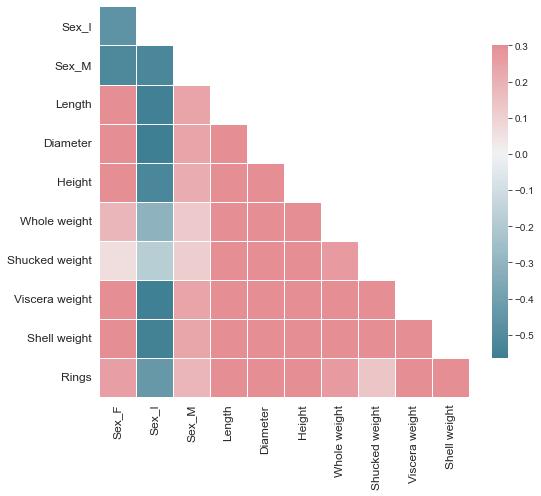

In [18]:
# Plot the dataset's correlation matrix
atom.plot_correlation()

In [19]:
# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", n_features=6)

Fitting FeatureSelector...
Performing feature selection ...
 --> Applying Principal Component Analysis...
   >>> Scaling features...
   >>> Explained variance ratio: 0.976


In [20]:
# Note that the fetaures are automatically renamed to Component 1, 2, etc...
atom.columns

['component 1',
 'component 2',
 'component 3',
 'component 4',
 'component 5',
 'component 6',
 'Rings']

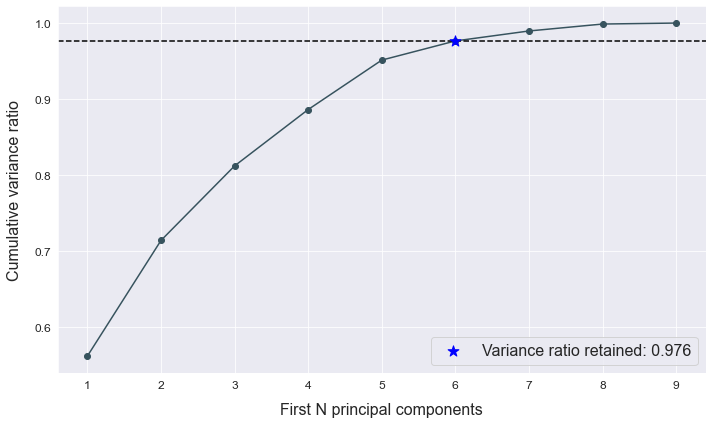

In [21]:
# Use the plotting methods to see the retained variance ratio
atom.plot_pca()

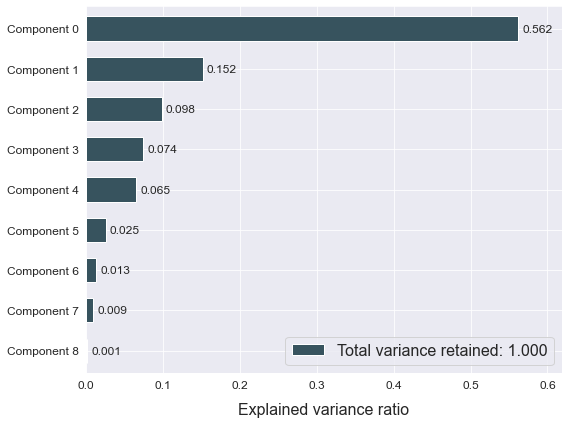

In [22]:
atom.plot_components(figsize=(8, 6))

### Run the pipeline

In [23]:
atom.run(
    models=["Tree", "Bag", "ET"],
    metric="MSE",
    n_calls=5,
    n_initial_points=2,
    bo_params={"base_estimator": "GBRT"},
    n_bootstrap=5,
)


Training ========================= >>
Models: Tree, Bag, ET
Metric: neg_mean_squared_error


Running BO for Decision Tree...
| call             |   criterion | splitter | max_depth | min_samples_split | min_samples_leaf | max_features | ccp_alpha | neg_mean_squared_error | best_neg_mean_squared_error |    time | total_time |
| ---------------- | ----------- | -------- | --------- | ----------------- | ---------------- | ------------ | --------- | ---------------------- | --------------------------- | ------- | ---------- |
| Initial point 1  | absolute_.. |   random |         7 |                 8 |               19 |         auto |    0.0161 |                 -7.725 |                      -7.725 |  0.109s |     0.125s |
| Initial point 2  | absolute_.. |     best |         6 |                 3 |               12 |         None |       0.0 |                -8.3733 |                      -7.725 |  0.219s |     0.469s |
| Iteration 3      |     poisson |   random |         7 |         

### Analyze the results

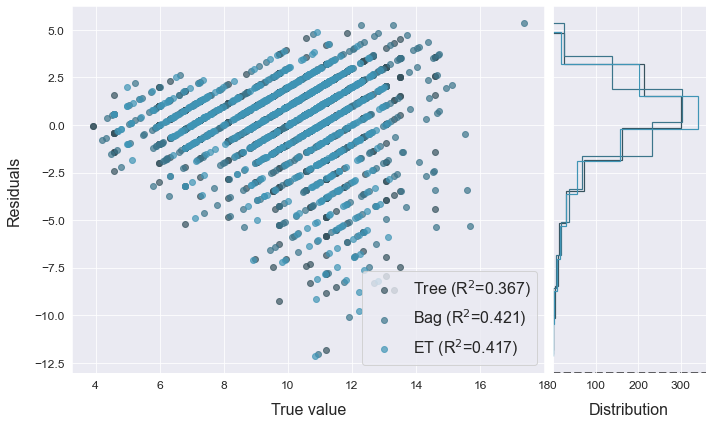

In [24]:
# Use the errors or residuals plots to check the model performances
atom.plot_residuals()

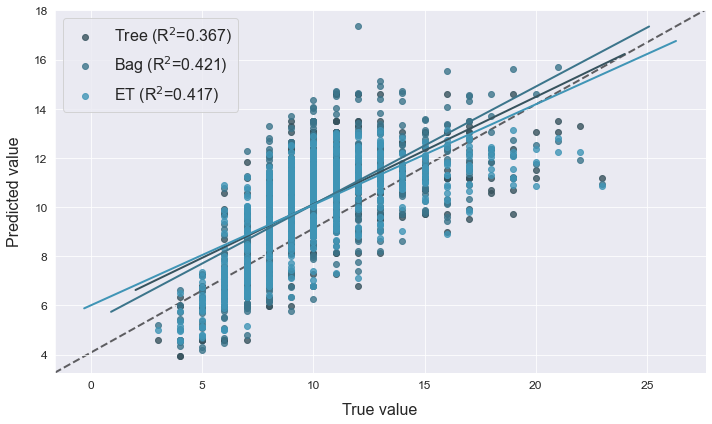

In [25]:
atom.plot_errors()

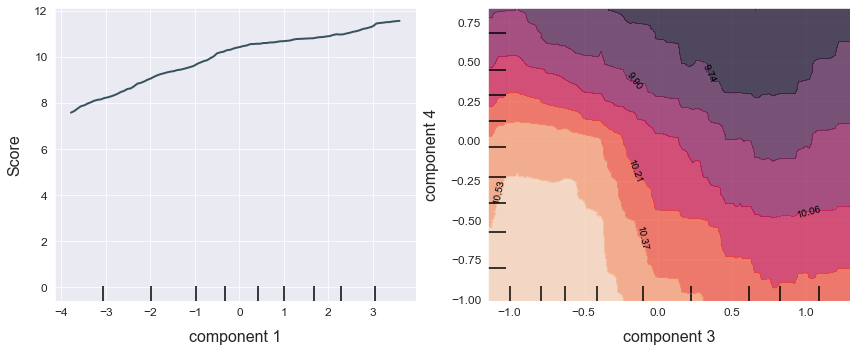

In [26]:
# Analyze the relation between the target response and the features
atom.n_jobs = 8  # The method can be slow...
atom.ET.plot_partial_dependence(columns=(0, (2, 3)), figsize=(12, 5))